In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

from src.preprocess import preprocess_pipeline

/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load data

In [3]:
train = pd.read_excel('../dataset/train.xlsx')
test = pd.read_excel('../dataset/test.xlsx')

In [4]:
train.head()

,id,age,sector,edu,marital_status,field,family_rel,gender,investment_gain,investment_loss,working_hours,high_income
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,no
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,no
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,no
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,no
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,no


In [5]:
test.head()

,id,age,sector,edu,marital_status,field,family_rel,gender,investment_gain,investment_loss,working_hours
0,32562,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Male,0,0,40
1,32563,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50
2,32564,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40
3,32565,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40
4,32566,18,?,Some-college,Never-married,?,Own-child,Female,0,0,30


### Set up

In [6]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [7]:
def get_or_create_experiment(experiment_name):
    """
    Retrieve the ID of an existing MLflow experiment or create a new one if it doesn't exist.

    This function checks if an experiment with the given name exists within MLflow.
    If it does, the function returns its ID. If not, it creates a new experiment
    with the provided name and returns its ID.

    Parameters:
    - experiment_name (str): Name of the MLflow experiment.

    Returns:
    - str: ID of the existing or newly created MLflow experiment.
    """

    if experiment := mlflow.get_experiment_by_name(experiment_name):
        return experiment.experiment_id
    else:
        return mlflow.create_experiment(experiment_name)

In [8]:
experiment_id = get_or_create_experiment('vpbank_test')
experiment_id

'830608866115791988'

In [9]:
mlflow.set_experiment(experiment_id=experiment_id)

<Experiment: artifact_location='mlflow-artifacts:/830608866115791988', creation_time=1725184250620, experiment_id='830608866115791988', last_update_time=1725184250620, lifecycle_stage='active', name='vpbank_test', tags={}>

In [10]:
### Preprocess
train = preprocess_pipeline(train)

In [11]:
### Train
from src.model.lgbm import LGBM

model = LGBM(train)

[I 2024-09-02 15:29:29,064] A new study created in memory with name: no-name-25c3de94-6da0-4d4a-9692-2c795f03ed22
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna

ENCODING TRAIN SET...
ENCODING TEST SET...
ENCODING TRAIN SET...
ENCODING TEST SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


ENCODING TRAIN SET...
ENCODING TEST SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


ENCODING TRAIN SET...
ENCODING TEST SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-09-02 15:29:50,014] Trial 0 finished with value: 0.5241444605643579 and parameters: {'lambda_l1': 0.0007488187346087981, 'lambda_l2': 0.07187866501923688, 'num_leaves': 830, 'feature_fraction': 0.5, 'bagging_fraction': 0.8, 'bagging_freq': 3, 'min_child_samples': 41, 'n_estimators': 10000, 'learning_rate': 0.1442387927498383, 'max_depth': 4, 'min_data_in_leaf': 5900, 'max_bin': 292, 'min_gain_to_split': 11.34760977453469}. Best is trial 0 with value: 0.5241444605643579.


TRAIN: Trial 0 - Accuracy: 0.8140100327600328, F1: 0.5247160260031796, Precision: 0.6816755773034662, Recall: 0.4265285545403791, AUC: 0.8351295073698213
VALID: Trial 0 - Accuracy: 0.8136901105651105, F1: 0.5241444605643579, Precision: 0.6801649183903526, Recall: 0.42647949415886327, AUC: 0.834462552179537
ENCODING TRAIN SET...
ENCODING TEST SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are 

ENCODING TRAIN SET...
ENCODING TEST SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


ENCODING TRAIN SET...
ENCODING TEST SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


ENCODING TRAIN SET...
ENCODING TEST SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2024-09-02 15:30:11,417] Trial 1 finished with value: 0.3411977085351929 and parameters: {'lambda_l1': 0.0010910866201596558, 'lambda_l2': 9.557167022613521, 'num_leaves': 430, 'feature_fraction': 0.4, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'min_child_samples': 96, 'n_estimators': 10000, 'learning_rate': 0.287654901662711, 'max_depth': 9, 'min_data_in_leaf': 7500, 'max_bin': 201, 'min_gain_to_split': 9.865229452568968}. Best is trial 0 with value: 0.5241444605643579.


TRAIN: Trial 1 - Accuracy: 0.7895423832923834, F1: 0.3448761642331404, Precision: 0.6800085641704205, Recall: 0.23800676383021308, AUC: 0.8140683157038081
VALID: Trial 1 - Accuracy: 0.789004914004914, F1: 0.3411977085351929, Precision: 0.6772250978276824, Recall: 0.23622253623849027, AUC: 0.8137835564169972
ENCODING TRAIN SET...
ENCODING TEST SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [50, 1000] and step=20, but the range is not divisible by `step`. It will be replaced by [50, 990].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/optuna/trial/_trial.py:676: RuntimeWarning: Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are 

ENCODING TRAIN SET...
ENCODING TEST SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{ali

ENCODING TRAIN SET...
ENCODING TEST SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{ali

ENCODING TRAIN SET...
ENCODING TEST SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[I 2024-09-02 15:30:36,930] Trial 2 finished with value: 0.0 and parameters: {'lambda_l1': 0.0006913786942189071, 'lambda_l2': 0.059363764327395825, 'num_leaves': 650, 'feature_fraction': 1.0, 'bagging_fraction': 0.4, 'bagging_freq': 7, 'mi

TRAIN: Trial 2 - Accuracy: 0.7592905405405406, F1: 0.0, Precision: 0.0, Recall: 0.0, AUC: 0.5
VALID: Trial 2 - Accuracy: 0.7592905405405406, F1: 0.0, Precision: 0.0, Recall: 0.0, AUC: 0.5
Number of finished trials: 3
Best trial:
  Value: 0.5241444605643579
ENCODING TEST SET...


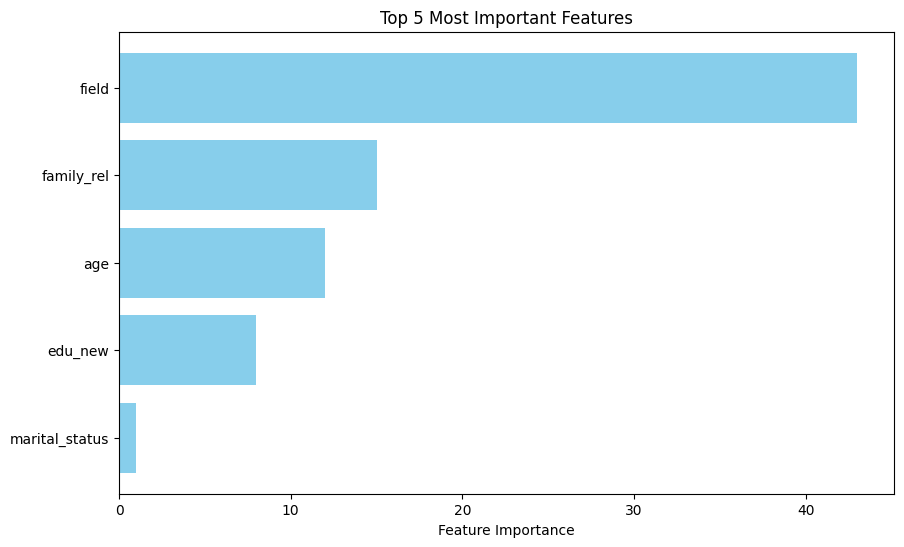

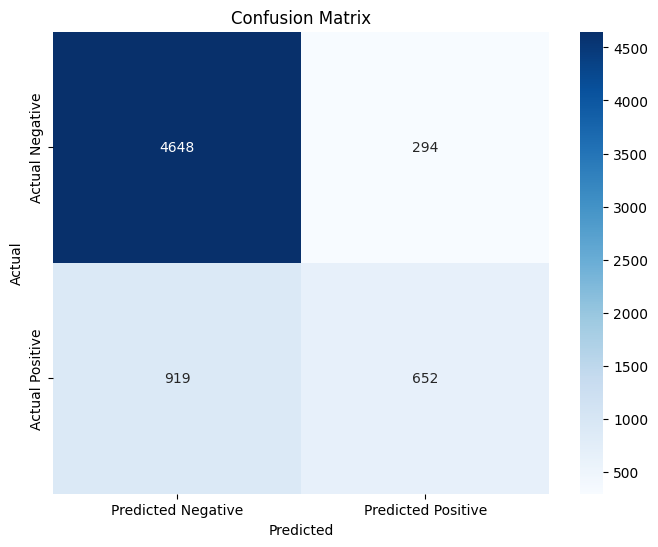

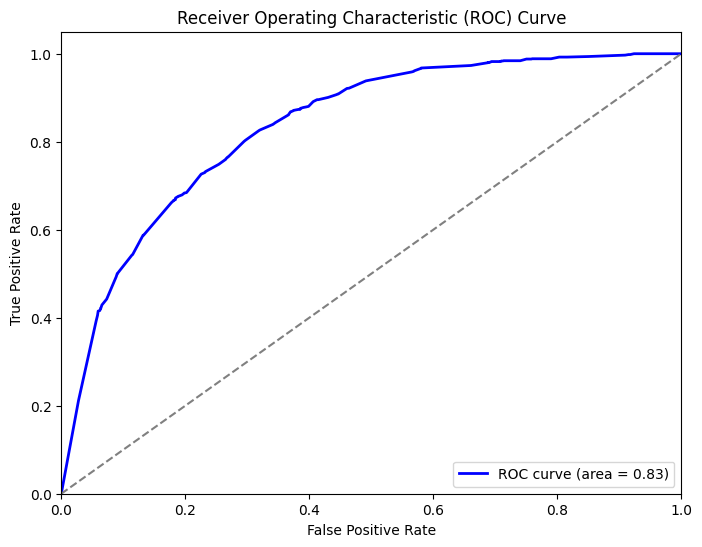

In [12]:
model.run(n_splits=4, n_trials=3)

### Log model artifacts

In [15]:
metrics = {}
metrics['accuracy'] = model.cls_report['accuracy']
metrics['macro_precision'] = model.cls_report['macro avg']['precision']
metrics['macro_recall'] = model.cls_report['macro avg']['recall']
metrics['macro_f1_score'] = model.cls_report['macro avg']['f1-score']
metrics

{'accuracy': 0.8137571011822509,
 'macro_precision': 0.7620689118259936,
 'macro_recall': 0.6777660969087371,
 'macro_f1_score': 0.7013261009831973}

In [23]:
from mlflow.models import infer_signature
from src.preprocess import label_encode_datasets


X_train = train.drop('high_income', axis=1).head()
X_train = label_encode_datasets(X_train)

signature = infer_signature(X_train, model.best_model.predict(X_train))
signature

ENCODING TRAIN SET...


/Users/kieusontung/Library/CloudStorage/OneDrive-Personal/Work/VPBank/VPBank/.venv/lib/python3.9/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


inputs: 
  ['id': long (required), 'age': long (required), 'sector': long (required), 'edu': long (required), 'marital_status': long (required), 'field': long (required), 'family_rel': long (required), 'gender': long (required), 'investment_gain': long (required), 'investment_loss': long (required), 'working_hours': long (required), 'edu_new': long (required), 'marital_status_new': long (required)]
outputs: 
  [Tensor('float64', (-1,))]
params: 
  None

In [24]:
# Log to MLFlow

with mlflow.start_run():
    mlflow.log_metrics(metrics)
    mlflow.log_params(model.best_params)
    mlflow.lightgbm.log_model(
        model.best_model,
        artifact_path='LightGBM',
        signature=signature,
        input_example=X_train
    )

2024/09/02 15:51:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run orderly-cat-356 at: http://127.0.0.1:5000/#/experiments/830608866115791988/runs/7e62a33fd6db44ee97b8c4de0e7184ab.
2024/09/02 15:51:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/830608866115791988.


### Register model

In [17]:
# model_name = 'LightGBM'
# run_id = 'ffd41eb4c3414ff698f2724365ca4370'
# model_uri = f'runs:/{run_id}/{model_name}'

# result = mlflow.register_model(model_uri, model_name)